#### Jasmine Malik (jm5xx@virginia.edu) DS 5001 Spring 2023

#### Sentiment Analysis

In [2]:
novels_csv = 'CORP_CLEAN.csv'
vocab_csv = 'VOCAB_CLEAN.csv'
lib_csv = 'LIB_ADDED.csv'
bow_csv = 'myBOW.csv'


In [3]:
# For TOKENS
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1]
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]
salex_csv = 'salex_nrc.csv'
emo_cols = "anger anticipation disgust fear joy sadness surprise trust sentiment".split()

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly_express as px
from IPython.display import display, HTML
sns.set()

In [16]:
TOKENS = pd.read_csv(novels_csv).set_index(OHCO).sort_index()
VOCAB = pd.read_csv(vocab_csv).set_index('term_str').sort_index()
LIB = pd.read_csv(lib_csv).set_index('book_id')[['author','title_gender','gender']].sort_index()
BOW = pd.read_csv(bow_csv).set_index(['book_id','chap_num','term_str']).sort_index()
BOW

n        tf     tfidf
book_id chap_num term_str                          
1       1        a           23  0.019793  0.000165
                 abide        1  0.000861  0.004048
                 above        1  0.000861  0.000978
                 absence      1  0.000861  0.002074
                 adoration,   1  0.000861  0.005769
...                          ..       ...       ...
20      34       yet          1  0.000434  0.000146
                 you         19  0.008250  0.001226
                 you've       1  0.000434  0.000806
                 you,         1  0.000434  0.000249
                 your         1  0.000434  0.000139

[599887 rows x 3 columns]

In [17]:
LIB

,author,title_gender,gender
book_id,,,
1,FLORENCE L. BARCLAY,Ladies F,female
2,FLORENCE L. BARCLAY,Postern F,female
3,ARNOLD BENNETT,Babylon M,male
4,ARNOLD BENNETT,Helen M,male
5,FRANCES HODGSON BURNETT,Gardern M,male
6,FRANCES HODGSON BURNETT,Princess M,male
7,G. K. CHESTERTON,Innocence M,male
8,G. K. CHESTERTON,Napolean M,male
9,JOSEPH CONRAD,Alamayer M,male


In [8]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [9]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


### Combine SALEX with VOCAB

In [10]:
V = pd.concat([VOCAB.reset_index().set_index('term_str'), SALEX], join='inner', axis=1) #\
    # .reset_index().set_index('term_id')
V.head()

,n,n_chars,p,i,max_pos,n_pos,cat_pos,stop,stem_porter,stem_snowball,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,sentiment
term_str,,,,,,,,,,,,,,,,,,,,,
abandon,15,7,7.968690e-06,16.937226,VB,2,"{'VB', 'NNS'}",0,abandon,abandon,...,0,0,1,0,1,0,1,0,0,-1
abandoned,34,9,1.806237e-05,15.756654,VBN,3,"{'VBD', 'JJ', 'VBN'}",0,abandon,abandon,...,0,0,1,0,1,0,1,0,0,-1
abandonment,12,11,6.374952e-06,17.259154,NN,1,{'NN'},0,abandon,abandon,...,0,0,1,0,1,0,1,1,0,-1
abduction,2,9,1.062492e-06,19.844117,NN,1,{'NN'},0,abduct,abduct,...,0,0,1,0,1,0,1,1,0,-1
aberration,1,10,5.312460e-07,20.844117,NN,1,{'NN'},0,aberr,aberr,...,0,1,0,0,1,0,0,0,0,-1


### Merge VOCAB with BOW


In [11]:
B = BOW.join(V[['max_pos'] + emo_cols], on='term_str', rsuffix='_v').dropna()
B

n        tf     tfidf max_pos  anger  anticipation  \
book_id chap_num term_str                                                       
1       1        absence   1  0.000861  0.002074      NN    0.0           0.0   
                 anguish   1  0.000861  0.003218      NN    1.0           0.0   
                 beating   3  0.002582  0.007869     VBG    1.0           0.0   
                 blindly   1  0.000861  0.004582      RB    0.0           0.0   
                 broken    1  0.000861  0.001326     VBN    1.0           0.0   
...                       ..       ...       ...     ...    ...           ...   
20      34       unable    2  0.000868  0.002379      JJ    0.0           0.0   
                 unity     1  0.000434  0.002542      NN    0.0           0.0   
                 vision    2  0.000868  0.001926      NN    0.0           1.0   
                 word      2  0.000868  0.000683      NN    0.0           0.0   
                 words     3  0.001303  0.000858     NNS    1.0           0.0   

                           disgust  fear  joy  sadness  surprise  trust  \
book_id chap_num term_str                                                 
1       1        absence       0.0   1.0  0.0      1.0       0.0    0.0   
                 anguish       0.0   1.0  0.0      1.0       0.0    0.0   
                 beating       0.0   1.0  0.0      1.0       0.0    0.0   
                 blindly       0.0   0.0  0.0      1.0       0.0    0.0   
                 broken        0.0   1.0  0.0      1.0       0.0    0.0   
...                            ...   ...  ...      ...       ...    ...   
20      34       unable        0.0   0.0  0.0      1.0       0.0    0.0   
                 unity         0.0   0.0  0.0      0.0       0.0    1.0   
                 vision        0.0   0.0  0.0      0.0       0.0    0.0   
                 word          0.0   0.0  0.0      0.0       0.0    1.0   
                 words         0.0   0.0  0.0      0.0       0.0    0.0   

                           sentiment  
book_id chap_num term_str             
1       1        absence        -1.0  
                 anguish        -1.0  
                 beating        -1.0  
                 blindly        -1.0  
                 broken         -1.0  
...                              ...  
20      34       unable         -1.0  
                 unity           1.0  
                 vision          1.0  
                 word            1.0  
                 words          -1.0  

[62153 rows x 13 columns]

### Weight Emotions by TFIDF

In [12]:

for col in emo_cols:
    B[col] = B[col] * B.tfidf
B.head()

n        tf     tfidf max_pos     anger  \
book_id chap_num term_str                                            
1       1        absence   1  0.000861  0.002074      NN  0.000000   
                 anguish   1  0.000861  0.003218      NN  0.003218   
                 beating   3  0.002582  0.007869     VBG  0.007869   
                 blindly   1  0.000861  0.004582      RB  0.000000   
                 broken    1  0.000861  0.001326     VBN  0.001326   

                           anticipation  disgust      fear  joy   sadness  \
book_id chap_num term_str                                                   
1       1        absence            0.0      0.0  0.002074  0.0  0.002074   
                 anguish            0.0      0.0  0.003218  0.0  0.003218   
                 beating            0.0      0.0  0.007869  0.0  0.007869   
                 blindly            0.0      0.0  0.000000  0.0  0.004582   
                 broken             0.0      0.0  0.001326  0.0  0.001326   

                           surprise  trust  sentiment  
book_id chap_num term_str                              
1       1        absence        0.0    0.0  -0.002074  
                 anguish        0.0    0.0  -0.003218  
                 beating        0.0    0.0  -0.007869  
                 blindly        0.0    0.0  -0.004582  
                 broken         0.0    0.0  -0.001326

### Explore Emotion Words and POS


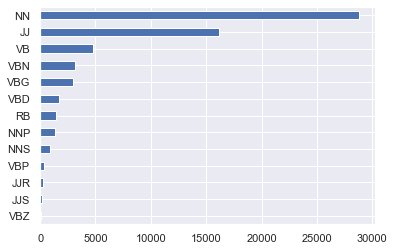

In [13]:
B.max_pos.value_counts().sort_values().plot.barh();

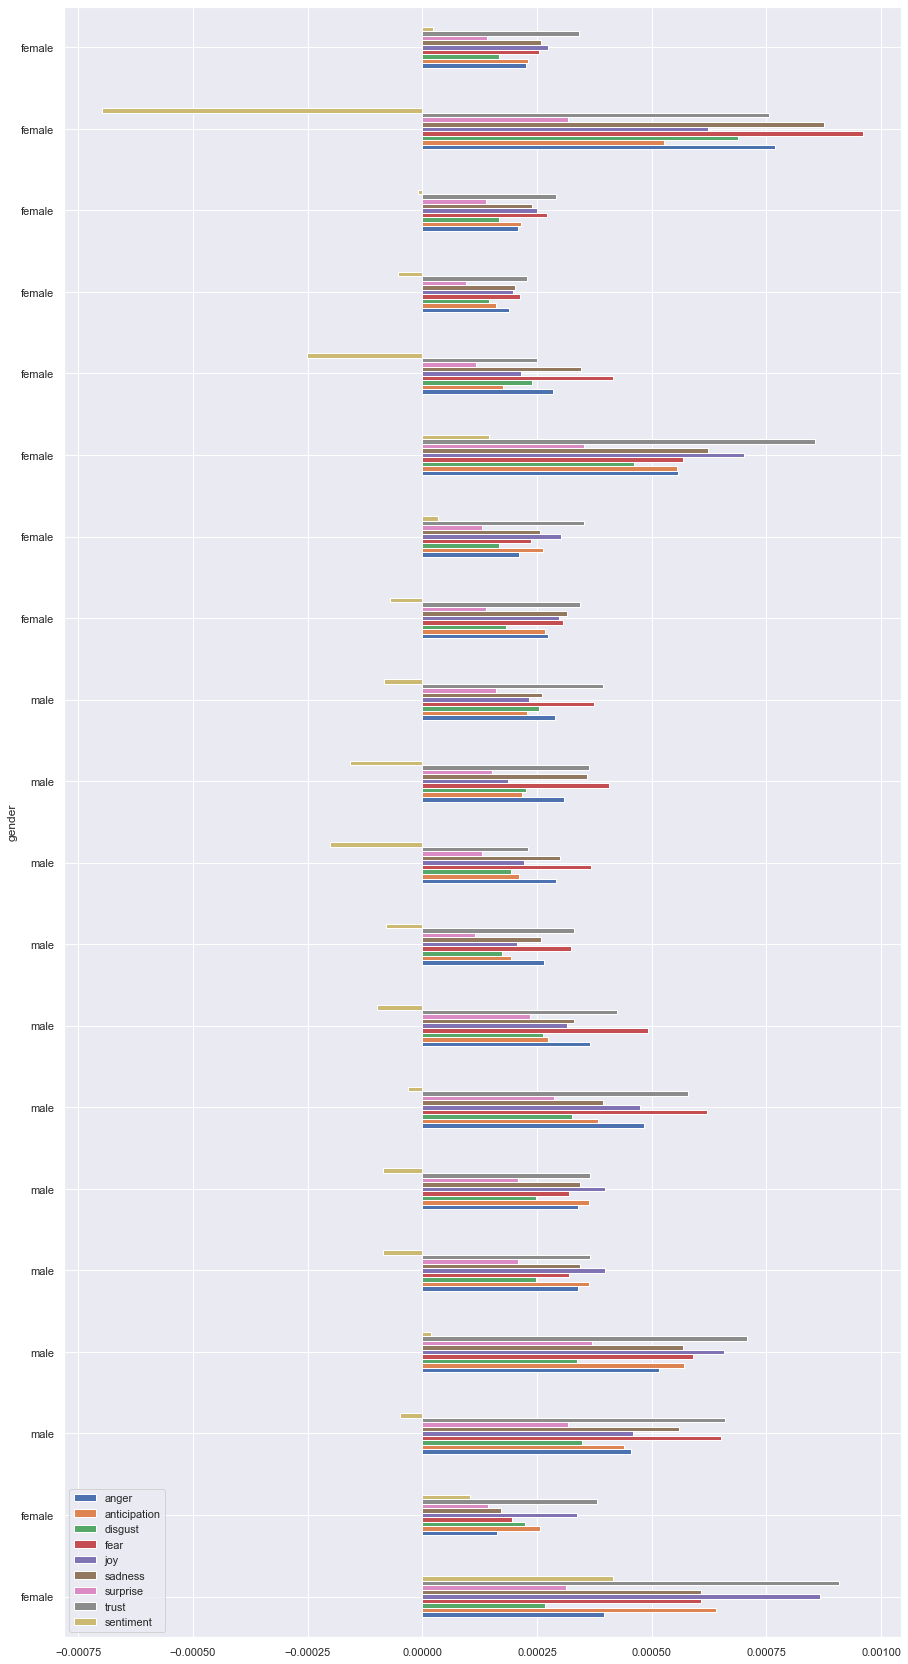

In [18]:
EMO_BOOKS = B.groupby(['book_id'])[emo_cols].mean()
EMO_CHAPS = B.groupby(['book_id','chap_num'])[emo_cols].mean()
EMO_BOOKS.index = LIB.gender #book_title
EMO_BOOKS.plot.barh(figsize=(15,30));

In [27]:
LIB = pd.read_csv(lib_csv)
LIB

,book_id,source_file_path,raw_title,regex,author,gender,book_len,n_chaps,kendall_sum,title_gender
0,1,100_english_novels-master/corpus/project/Barcl...,Ladies,'CHAPTER\\s[A-Za-z]',FLORENCE L. BARCLAY,female,121858,60,6.401330,Ladies F
1,2,100_english_novels-master/corpus/project/Barcl...,Postern,'^THE\\s[A-Za-z]+ DAY$',FLORENCE L. BARCLAY,female,39870,8,6.776220,Postern F
2,3,100_english_novels-master/corpus/project/Benne...,Babylon,'^Chapter\\s',ARNOLD BENNETT,male,65965,30,6.318788,Babylon M
3,4,100_english_novels-master/corpus/project/Benne...,Helen,'^Chapter\\s[0-9]+',ARNOLD BENNETT,male,52456,27,6.613275,Helen M
4,5,100_english_novels-master/corpus/project/Burne...,Garden,'^CHAPTER\\s[A-Za-z]',FRANCES HODGSON BURNETT,male,66798,19,7.546690,Gardern M
5,6,100_english_novels-master/corpus/project/Burne...,Princess,'^\\d\\s',FRANCES HODGSON BURNETT,male,66798,19,7.546690,Princess M
6,7,100_english_novels-master/corpus/project/Chest...,Innocence,'^\\s[A-Za-z]+ ',G. K. CHESTERTON,male,78996,25,6.516224,Innocence M
7,8,100_english_novels-master/corpus/project/Chest...,Napoleon,'^CHAPTER\\s[A-Za-z]',G. K. CHESTERTON,male,54652,15,6.209197,Napolean M
8,9,100_english_novels-master/corpus/project/Conra...,Almayer,'',JOSEPH CONRAD,male,169032,29,6.168169,Alamayer M
9,10,100_english_novels-master/corpus/project/Conra...,Nostromo,'^CHAPTER [A-Za-z]+',JOSEPH CONRAD,male,62976,12,6.723181,Nostromo M


In [28]:
LIB['book_len'].mean()

94323.35

In [30]:
LIB['n_chaps'].mean()

26.05